In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import HTML

# ▼近十年船舶產業產值：

In [2]:
index = list(range(2008,2019))
value = [658.68, 551.81, 540.26, 560.96, 608.31, 563.41, 602.18, 612.57, 622.68, 632.91, 641.45]

### (產值表)

In [3]:
display(pd.DataFrame(value, index = index, columns = ['船舶產值(新台幣億元)']))

,船舶產值(新台幣億元)
2008,658.68
2009,551.81
2010,540.26
2011,560.96
2012,608.31
2013,563.41
2014,602.18
2015,612.57
2016,622.68
2017,632.91


### (產值折線圖)

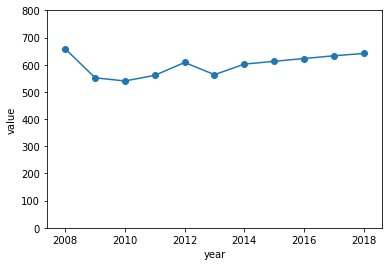

In [4]:
plt.plot(index, value)
plt.scatter(index, value)
plt.ylim(0,800)
plt.xlabel('year')
plt.ylabel('value')
plt.show()

### (產值與時間的相關係數)

-相關係數公式：
$$r=\frac{\sigma_{xy}}{\sigma_x\sigma_y}$$

In [5]:
print('r = ',stats.pearsonr(index, value)[0])

r =  0.44272513818159


#### → 正相關

# ▼近十五年船舶暨海洋產業研發中心專利與技術：

In [6]:
index2 = list(range(2004,2019))
tech = [7, 7, 15, 11, 8, 12, 9, 12, 15, 12, 10, 10, 7, 4, 4]
patent = [1, 4, 3, 11, 4, 6, 5, 4, 12, 13, 12, 20, 21, 24, 13]
sumt = 0
sump = 0
tech2 = []
patent2 = []
for i in tech:
    sumt += i
    tech2.append(sumt)
for j in patent:
    sump += j
    patent2.append(sump)
tech2 = np.array(tech2)
patent2 = np.array(patent2)
total = tech2 + patent2


- 由於中心所產出的產品**效能難以量化**，因此我們在這裡姑且以**中心每年產出的專利與技術數量**作為其效能來衡量。<br>需注意的是，因技術的發展是具有累積性的（*今年發展出的技術，並不會到了明年就失效*），因此我們是以**累積**數目來做分析。
 

### (中心每年產出技術與專利數量表)

In [7]:
df = pd.DataFrame(tech, index = index2, columns = ['Technology'])
df['Patent'] = patent
display(df)

,Technology,Patent
2004,7,1
2005,7,4
2006,15,3
2007,11,11
2008,8,4
2009,12,6
2010,9,5
2011,12,4
2012,15,12
2013,12,13


### (中心每年累積產出技術與專利數量折線圖)

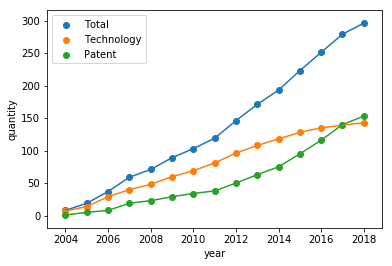

In [8]:
plt.plot(index2, total)
plt.plot(index2, tech2)
plt.plot(index2, patent2)
plt.scatter(index2, total, label = 'Total')
plt.scatter(index2, tech2, label = 'Technology')
plt.scatter(index2, patent2, label = 'Patent')
plt.xlabel('year')
plt.ylabel('quantity')
plt.legend()
plt.show()

- 以兩項加總的資料（藍色）來分析

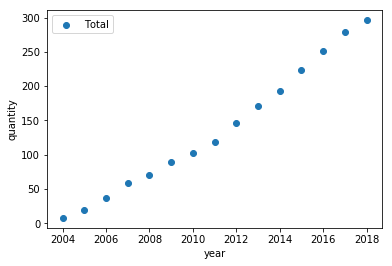

In [9]:
#plt.plot(index2, total)
plt.scatter(index2, total, label = 'Total')
plt.xlabel('year')
plt.ylabel('quantity')
plt.legend()
plt.show()

- **曲線擬和**<br>*- 用連續曲線近似地刻畫或比擬平面上離散點組所表示的坐標之間的函數關係*

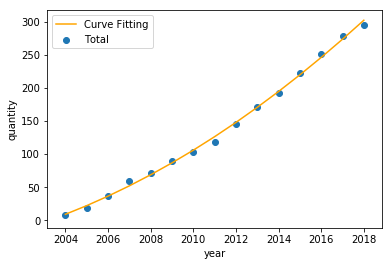

In [10]:
f1 = np.polyfit(index2, total, 3)
yvals = np.polyval(f1, index2)
plt.plot(index2, yvals,color = 'orange', label='Curve Fitting')
plt.scatter(index2, total, label = 'Total')
plt.xlabel('year')
plt.ylabel('quantity')
plt.legend()
plt.show()

- 未來十年曲線走向

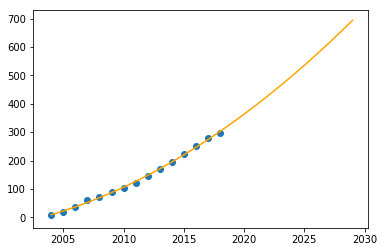

In [11]:
yvals = np.polyval(f1, range(2004,2030))
plt.plot(range(2004,2030), yvals,color = 'orange', label='polyfit values')
plt.scatter(index2, total, label = 'Total')
plt.show()

- **S型曲線**

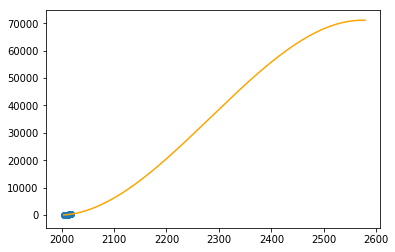

In [12]:
yvals = np.polyval(f1, range(2004,2580))
plt.plot(range(2004,2580), yvals,color = 'orange', label='polyfit values')
plt.scatter(index2, total, label = 'Total')
plt.show()

# ▼小結：

$~~~~~~~$在這個例子中，我們確實找到了科技發展的S型曲線，且依照實際繪出的曲線圖，我們可以發現此企業在未來仍有**極大的發展性**。不過礙於資料量過小，其實並不適合拿來預測那麼長時間的發展走向，因此，**我們在這裡僅以未來十年的預測圖，說明企業仍在快速發展，但不強調S型曲線圖所呈現出來的預測結果**。

In [13]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')